#### Imports

In [1]:
import pandas as pd
import numpy as np
import os

# Load and analyze data

In [2]:
df_meta_data = pd.read_csv('00_simulated_data/1_balanced_all_metadata.tsv', sep="\t")
print(f'size df: {len(df_meta_data)}')
print(f'keys:{df_meta_data.keys()}')
print(f'Nr different files: {df_meta_data["file"].unique().size}')
print(f'Different codintions: {df_meta_data["condition"].unique()}')
print(f'Different labs: {df_meta_data["lab"].unique()}')
df_meta_data.head()

df = pd.read_csv('00_simulated_data/1_balanced_intensities_data_no_batch.tsv', sep="\t")
print(f'data shape: {df.shape}')
df.drop(columns=['rowname'], inplace=True)


size df: 600
keys:Index(['file', 'condition', 'lab'], dtype='object')
Nr different files: 600
Different codintions: ['A' 'B']
Different labs: ['lab3' 'lab1' 'lab2']
data shape: (6000, 601)


## DF analysis

In [3]:
df.head(10)

,s.1,s.2,s.3,s.4,s.5,s.6,s.7,s.8,s.9,s.10,...,s.591,s.592,s.593,s.594,s.595,s.596,s.597,s.598,s.599,s.600
0,0.306759,0.009030,0.795219,1.925091,-0.369820,1.607347,0.668093,-1.015779,0.620443,-0.469487,...,-0.900936,0.226405,-1.392659,-0.904909,-0.038007,-1.758006,-1.708123,-1.380459,-0.452418,-0.975395
1,1.936036,1.241359,2.494587,-1.419317,2.045953,-0.645242,-0.162151,1.749453,1.909497,-2.104746,...,-1.912972,-0.554299,-2.015634,-0.139802,-2.179023,0.819403,1.072423,-0.826927,2.342183,-2.362233
2,-0.446169,2.160299,0.632408,-1.164468,0.735876,0.196877,-0.161377,0.441596,-1.054342,-0.876970,...,-2.069035,-1.660188,-1.587191,-1.050557,-1.063450,-2.317851,-1.234551,-1.261532,-0.216014,-0.512537
3,0.507732,0.318516,-2.189154,1.694059,-0.205212,0.099743,-0.514795,0.636508,0.217191,0.224594,...,0.808544,-0.159275,-0.224594,-0.904900,-0.960899,-0.247794,1.234673,-1.733287,-2.661307,0.473262
4,1.489814,2.408393,0.671784,1.400463,2.370321,2.067378,2.658187,1.449075,3.785107,2.919931,...,0.252348,0.085447,-0.269701,1.549186,0.319960,0.253052,-0.162951,1.740549,1.979373,0.766073
5,1.270386,-0.665405,0.379491,0.480890,1.063941,1.864269,-0.728089,0.203300,1.169392,-0.568587,...,-1.080258,0.331707,-1.363381,-0.716009,-1.004026,0.177371,0.197698,-0.231228,0.819963,-1.879348
6,0.735534,0.424771,0.520684,3.444128,0.356468,-2.196956,1.779277,2.675776,1.725129,2.795327,...,2.529678,1.426224,-1.399663,-2.769126,-0.342986,0.531683,-1.559017,0.613626,2.247572,1.818967
7,0.110404,0.804343,-0.887644,0.234401,-1.110186,1.089525,0.466002,-0.467520,-0.462359,-0.575274,...,-0.565062,-1.079267,-1.936592,-1.217427,-2.021567,-0.986335,-0.948598,0.705200,-1.267197,-0.652137
8,-2.577372,-2.441885,3.828207,0.577440,0.467733,0.030646,2.942702,-1.354332,0.752142,-0.962789,...,-1.490273,1.312477,-2.520588,-2.015016,1.324924,-0.927174,3.380883,0.121920,-1.548543,-0.404090
9,0.317244,0.949730,1.418558,2.203218,1.482200,0.502176,0.901645,2.276928,3.137935,0.742333,...,-1.628535,-0.487917,-0.609679,4.058102,1.501325,2.617751,0.771953,0.106194,-0.567018,1.692025


In [4]:
df_meta_data.groupby(['condition','lab']).count()

file
condition lab       
A         lab1   100
          lab2   100
          lab3   100
B         lab1   100
          lab2   100
          lab3   100

In [5]:
print(f'Count null im df: {df[df==0].sum().sum()}')
print(f'Count 0 im df: {df[df==0].sum().sum()}')
print(f'Max value im df: {df.max().max()}')
print(f'Min value im df: {df.min().min()}')
print(f'Mean value im df: {df.mean().mean()}')
print(f'Median value im df: {df.median().median()}')
print(f'Standard deviation value im df: {df.std().std()}')


Count null im df: 0.0
Count 0 im df: 0.0
Max value im df: 41.0361530698842
Min value im df: -30.8052715308984
Mean value im df: 0.18211636586938074
Median value im df: 0.15806559945749224
Standard deviation value im df: 0.029182835037475482


In [6]:
df.describe().mean(axis=1)

count    6000.000000
mean        0.182116
std         2.052836
min       -15.121730
25%        -1.053605
50%         0.159049
75%         1.403192
max        15.450765
dtype: float64

#### Protein (row) analysis

In [7]:
max_indices = []
min_indices = []
for column in df.keys():
  max_indices.append(df[column].argmax())
  min_indices.append(df[column].argmin())

max_indices = np.array(max_indices)
min_indices = np.array(min_indices)
max_indices = np.unique(max_indices)
min_indices = np.unique(min_indices)
print(f'Nr of unique max indices: {max_indices.size}')
print(f'Nr of unique min indices: {min_indices.size}')

min_max_rows = np.append(max_indices, min_indices)
np.unique(min_max_rows).size
print(f'Nr of unique min/max indices: {np.unique(min_max_rows).size}')
min_max_rows

Nr of unique max indices: 105
Nr of unique min indices: 98
Nr of unique min/max indices: 138


array([  11,  178,  217,  218,  232,  318,  487,  542,  543,  544,  613,
        638,  691,  693,  723,  753,  782,  836,  854,  872,  876,  947,
       1054, 1079, 1203, 1236, 1264, 1267, 1308, 1321, 1325, 1345, 1447,
       1453, 1484, 1538, 1691, 1816, 1833, 1850, 1920, 1940, 1964, 1990,
       2106, 2198, 2200, 2317, 2409, 2485, 2491, 2515, 2542, 2557, 2730,
       2777, 2921, 2964, 3044, 3215, 3272, 3278, 3326, 3389, 3533, 3541,
       3569, 3685, 3733, 3752, 3769, 3788, 3878, 3900, 4090, 4153, 4302,
       4341, 4452, 4492, 4594, 4648, 4845, 4846, 4909, 4938, 4943, 5088,
       5128, 5148, 5151, 5167, 5186, 5211, 5230, 5236, 5241, 5345, 5414,
       5437, 5557, 5609, 5650, 5725, 5937,   11,  178,  217,  218,  232,
        318,  398,  544,  613,  638,  691,  693,  750,  753,  782,  808,
        854,  872,  947, 1203, 1321, 1325, 1345, 1372, 1447, 1484, 1538,
       1678, 1684, 1833, 1850, 1964, 1990, 2003, 2089, 2106, 2200, 2239,
       2317, 2485, 2491, 2510, 2515, 2577, 2593, 26

In [8]:
highest_var_rows = df.std(axis=1).sort_values()[-100:].index.values

In [9]:
interesting_rows =np.append(highest_var_rows, min_max_rows)
print("Total nr. of rows with high variance / min & max values:")
print(np.unique(np.append(highest_var_rows, min_max_rows)).size)

Total nr. of rows with high variance / min & max values:
143


#### Sample (column) analysis

In [10]:
topx = 5
print(f'Highest summed samples (top {topx}):\n{df.sum().sort_values()[-topx:]}')
print(f'Lowest summed samples (top {topx}):\n{df.sum().sort_values()[:topx]}')
print(f'Highest variance in sample (top {topx}):\n{df.std().sort_values()[-topx:]}')
print(f'Lowest vairance in samples (top {topx}):\n{df.std().sort_values()[:topx]}')


Highest summed samples (top 5):
s.260    1469.317882
s.209    1473.963750
s.297    1482.120893
s.127    1497.229997
s.64     1595.400156
dtype: float64
Lowest summed samples (top 5):
s.317    606.258837
s.370    653.353942
s.455    667.769647
s.343    682.305563
s.403    693.846052
dtype: float64
Highest variance in sample (top 5):
s.466    2.137962
s.279    2.141078
s.109    2.148169
s.137    2.151998
s.306    2.167880
dtype: float64
Lowest vairance in samples (top 5):
s.252    1.978631
s.525    1.983319
s.590    1.984720
s.549    1.985118
s.4      1.986736
dtype: float64


In [11]:
!pip install torch torchvision torchmetrics
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from torch import nn
from sklearn.cluster import KMeans


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [12]:
sample_data = df.T
sample_data['lab'] = df_meta_data['lab'].values
grouped_data = sample_data.groupby('lab')
grouped_data.mean()


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
lab,,,,,,,,,,,,,,,,,,,,,
lab1,-0.185572,-0.622078,-0.339407,-0.167128,1.053053,-0.240043,1.014095,-0.426729,-0.591065,1.460200,...,-0.622559,1.261222,1.897502,-0.757706,0.364536,1.319693,-0.704419,-2.112198,1.103052,-0.500695
lab2,-0.314772,-0.183725,-0.389405,-0.158470,1.185869,-0.362975,1.266408,-0.279602,-1.072922,0.958017,...,-0.733970,1.248808,1.873856,-0.902321,0.276288,1.190917,-1.272811,-1.641226,1.081770,-0.501103
lab3,-0.314556,-0.354332,-0.240572,-0.052113,1.199571,-0.306143,1.185094,-0.536574,-0.650045,1.403596,...,-0.887153,1.284302,1.833994,-0.804477,0.495191,1.216369,-1.063772,-2.018593,1.166987,-0.524508


## Normalize data and train VAE

In [13]:
# normalize data by lab-mean
def z_score_normalize(group):
    return (group - group.mean()) / group.std()

data_over_all_labs = (df.T - df.mean(axis=1))/df.std(axis=1)
#normalized_data = grouped_data.transform(z_score_normalize, )



In [14]:
#print(normalized_data.shape)
#Convert to PyTorch tensor
proteomics_tensor = torch.tensor(data_over_all_labs.values, dtype=torch.float32)

In [64]:
# Define Encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3):
        super(Encoder, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim_1),
            nn.ReLU(),
            nn.Linear(hidden_dim_1, hidden_dim_2),
            nn.ReLU(),
            nn.Linear(hidden_dim_2, hidden_dim_3),
            nn.ReLU(),
            nn.Linear(hidden_dim_3, latent_dim)
        )
    
    def forward(self, x):
        return self.fc(x)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

# Define Decoder
class Decoder(nn.Module):
    def __init__(self, latent_dim, input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3):
        super(Decoder, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim_3),
            nn.ReLU(),
            nn.Linear(hidden_dim_3, hidden_dim_2),
            nn.ReLU(),
            nn.Linear(hidden_dim_2, hidden_dim_1),
            nn.ReLU(),
            nn.Linear(hidden_dim_1, input_dim)
        )
    
    def forward(self, z):
        return self.fc(z)

# Define GOAE Model
class GOAE(nn.Module):
    def __init__(self, input_dim, latent_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3):
        super(GOAE, self).__init__()
        self.encoder = Encoder(input_dim, latent_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3)
        self.decoder = Decoder(latent_dim, input_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3)
    
    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return z, x_reconstructed


In [65]:
# Orthogonality Loss
def orthogonality_loss(z):
    zt_z = torch.matmul(z.T, z)
    identity = torch.eye(zt_z.size(0), device=z.device)
    return torch.norm(zt_z - identity, p='fro')**2

In [66]:
# Training
def train_goae(model, data_loader, epochs=50, latent_dim=10, learning_rate=1e-3, lambda_ortho=0, training_nois_percentage=0.1):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    
    for epoch in range(epochs):
        total_loss = 0
        for x_batch in data_loader:
            x_batch = x_batch[0]
            x_batch_noisy = torch.randn_like(x_batch) * training_nois_percentage
            # Forward pass
            z, x_reconstructed = model(x_batch_noisy)
            
            # Loss
            reconstruction_loss = criterion(x_reconstructed, x_batch)
            ortho_loss = orthogonality_loss(z)
            loss = reconstruction_loss + lambda_ortho * ortho_loss
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(data_loader)}")


proteomics_ds = TensorDataset(proteomics_tensor)
proteomics_dl = DataLoader(proteomics_ds, batch_size=64, shuffle=True)
input_dim = proteomics_tensor.shape[1]
hidden_dim_1 = 500
hidden_dim_2 = 500
hidden_dim_3 = 2000
latent_dim = 70
epochs = 150

goae_model = GOAE(input_dim, latent_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3)
train_goae(goae_model, proteomics_dl, epochs=epochs)


Epoch 1, Loss: 0.9989011526107788
Epoch 2, Loss: 0.9990180253982544
Epoch 3, Loss: 0.9984803080558777
Epoch 4, Loss: 0.9987787783145905
Epoch 5, Loss: 0.9986200332641602
Epoch 6, Loss: 0.9988819301128388
Epoch 7, Loss: 0.9982069313526154
Epoch 8, Loss: 0.9985165178775788
Epoch 9, Loss: 0.9985104382038117
Epoch 10, Loss: 0.9986698925495148
Epoch 11, Loss: 0.9979518532752991
Epoch 12, Loss: 0.9986389577388763
Epoch 13, Loss: 0.9985405623912811
Epoch 14, Loss: 0.9983708798885346
Epoch 15, Loss: 0.9982116997241974
Epoch 16, Loss: 0.9984602749347686
Epoch 17, Loss: 0.9984151661396027
Epoch 18, Loss: 0.9987540662288665
Epoch 19, Loss: 0.9980802118778229
Epoch 20, Loss: 0.9981101334095002
Epoch 21, Loss: 0.9984955072402955
Epoch 22, Loss: 0.9989233374595642
Epoch 23, Loss: 0.9979648292064667
Epoch 24, Loss: 0.99832484126091
Epoch 25, Loss: 0.998733389377594
Epoch 26, Loss: 0.9986657202243805
Epoch 27, Loss: 0.9982752621173858
Epoch 28, Loss: 0.9984083473682404
Epoch 29, Loss: 0.99827587008476

In [67]:
os.makedirs("vae_models", exist_ok=True)
os.chdir("vae_models")
print(f"Models are saved to: {os.getcwd()}")

Models are saved to: /home/bernard/Uni/00_Biostat/Project/01---Federated-Patient-Stratification-with-AE---Biostatistik-und-KI-in-der-Medizin/centralVae/vae_models/vae_models/vae_models/vae_models/vae_models


In [68]:
# for save and/or load VAE
filename=f'GOAN_{epochs}epochs_{hidden_dim_1}hd1_{hidden_dim_2}hd2_{latent_dim}ld.pth'
torch.save(goae_model, filename)
#loaded_vae = torch.load(filename)

# latent representation
def extract_latent_space(model, data_loader):
    model.encoder.eval()
    latent_representations = []
    with torch.no_grad():
        for batch in data_loader:
            x = batch[0]
            x = x.view(x.size(0), -1)
            bach_latent_reepresentation = model.encoder(x)
           
            latent_representations.append(bach_latent_reepresentation)
    return np.vstack(latent_representations)
latent_representations = extract_latent_space(goae_model, proteomics_dl)

In [69]:
# k-means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=22)
clusters = kmeans.fit_predict(latent_representations)

In [70]:
len(clusters)

600

In [71]:
# Add cluster labels back to your original DataFrame
sample_data['Cluster'] = clusters.astype(int)
sample_data["Condition"] = df_meta_data["condition"].values
sample_data["Cluster"] = sample_data['Cluster'].apply(lambda x:"A" if x==1 else "B")


In [72]:
# compute how often cluster is "correct"
equal_count = (sample_data["Condition"]==sample_data["Cluster"])
equal_count.value_counts()

True     313
False    287
Name: count, dtype: int64

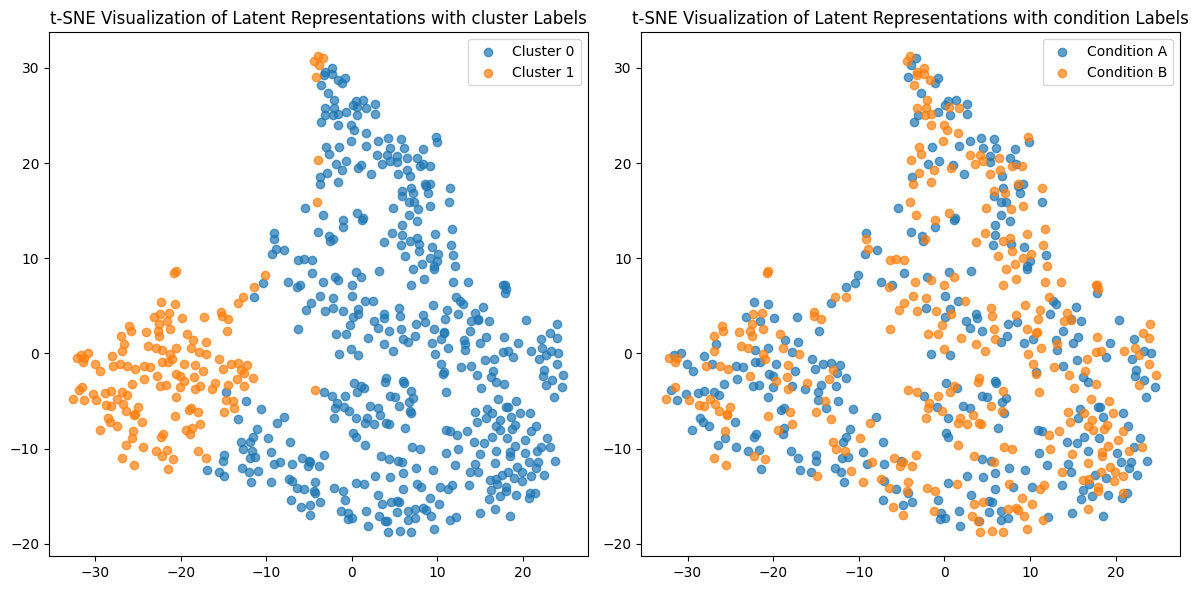

In [73]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
latent_2d = tsne.fit_transform(latent_representations)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for cluster in set(clusters):
    indices = (clusters == cluster)
    axes[0].scatter(latent_2d[indices, 0], latent_2d[indices, 1], label=f'Cluster {cluster}', alpha=0.7)
axes[0].set_title('t-SNE Visualization of Latent Representations with cluster Labels')
axes[0].legend()

conditions = df_meta_data['condition'].values
unique_conditions = np.unique(conditions)
for condition in unique_conditions:
    indices = (conditions == condition)
    axes[1].scatter(
        latent_2d[indices, 0],
        latent_2d[indices, 1],
        label=f'Condition {condition}',
        alpha=0.7
    )
axes[1].set_title('t-SNE Visualization of Latent Representations with condition Labels')
axes[1].legend()

plt.tight_layout()
plt.show()


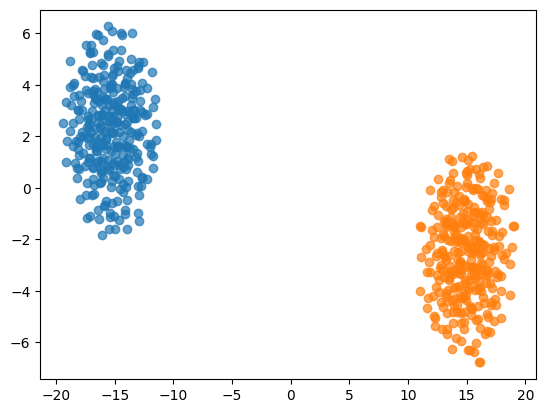

In [38]:
## baseline using TSNE
tsne = TSNE(n_components=2, random_state=0)
df_2d = tsne.fit_transform(df.T)
conditions = df_meta_data['condition'].values
unique_conditions = np.unique(conditions)
for condition in unique_conditions:
    indices = (conditions == condition)
    plt.scatter(
        df_2d[indices, 0],
        df_2d[indices, 1],
        label=f'Condition {condition}',
        alpha=0.7
    )


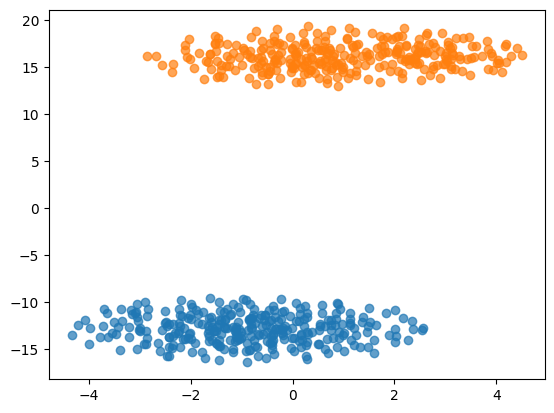

In [50]:
## baseline using TSNE
tsne = TSNE(n_components=2, random_state=0)
data_over_all_labs_2d = tsne.fit_transform(data_over_all_labs)
conditions = df_meta_data['condition'].values
unique_conditions = np.unique(conditions)
for condition in unique_conditions:
    indices = (conditions == condition)
    plt.scatter(
        data_over_all_labs_2d[indices, 0],
        data_over_all_labs_2d[indices, 1],
        label=f'Condition {condition}',
        alpha=0.7
    )
